In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sab
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [2]:
dataset = "D:/PYTHON/2.datasets/winequality-red.csv"

winedf = pd.read_csv(dataset)

winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
winedf.shape


winedf.count()

winedf.describe()

winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
winedf.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

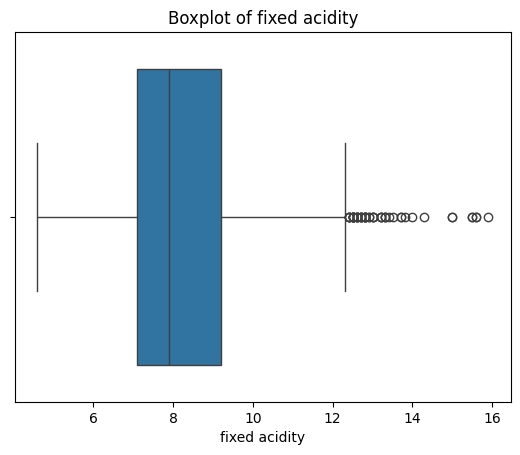

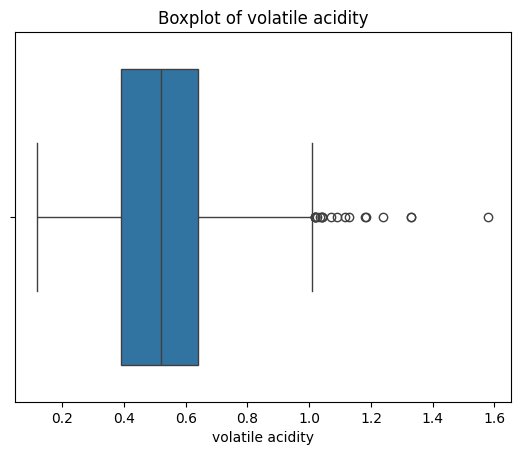

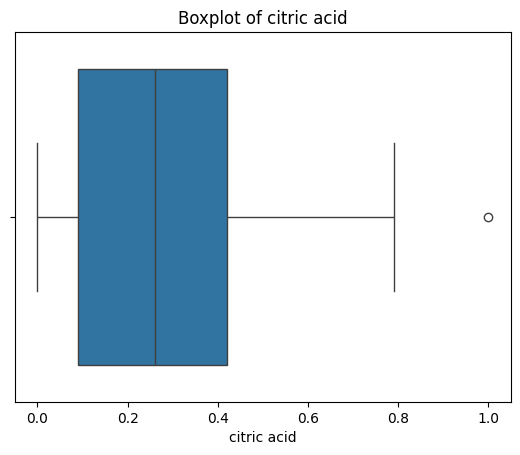

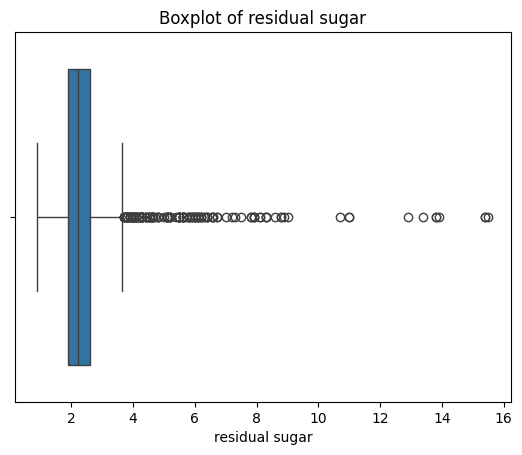

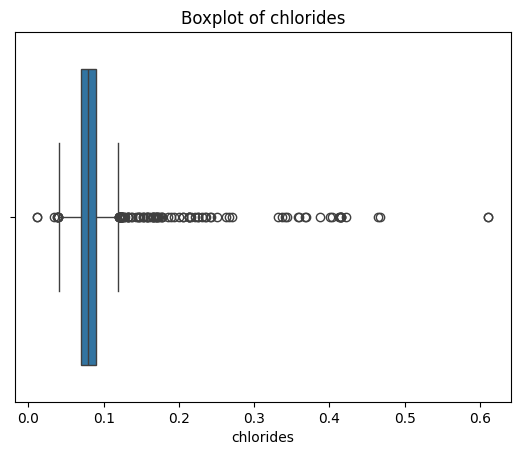

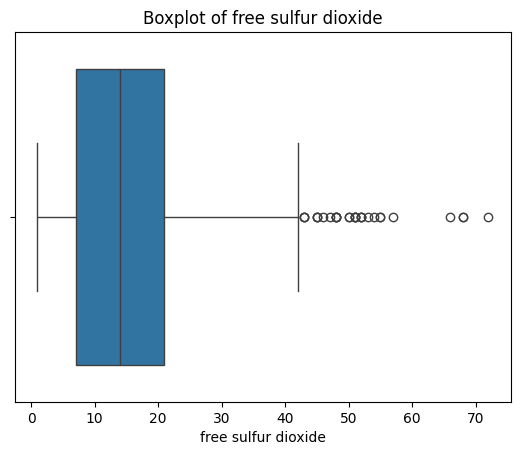

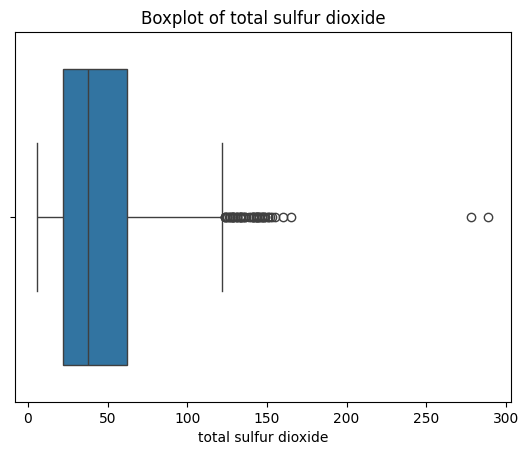

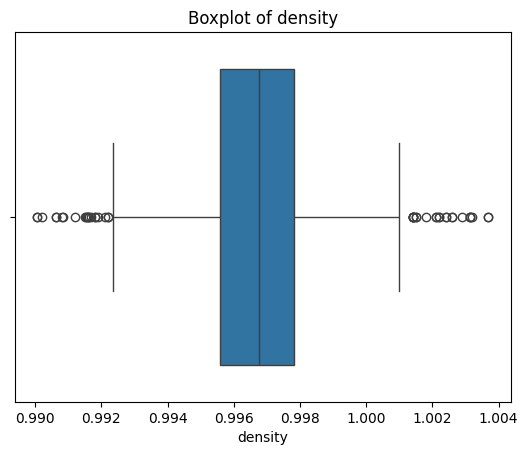

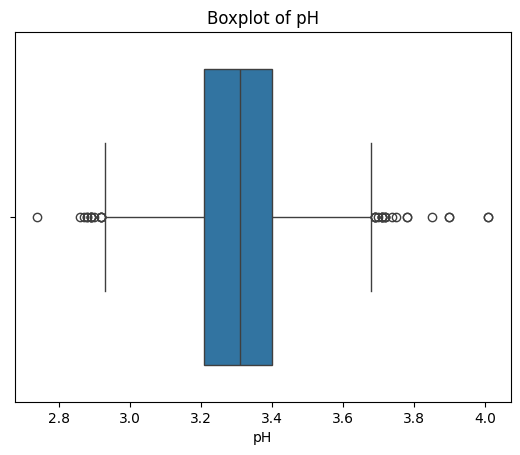

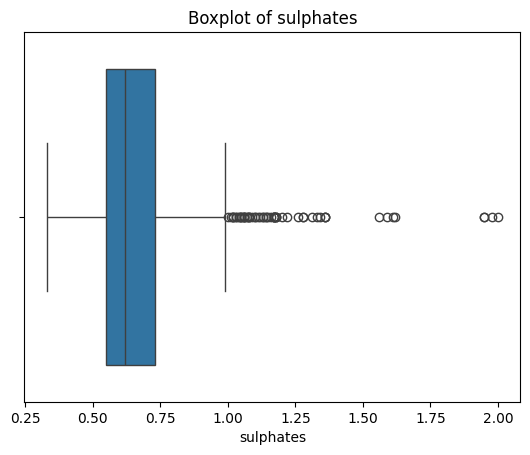

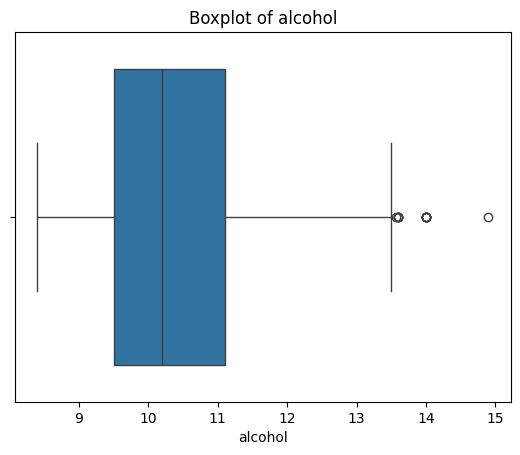

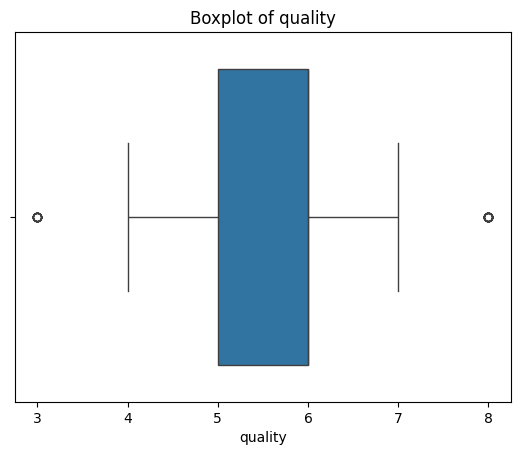

In [5]:
for i in winedf.columns:
    plt.figure()  # Create a new figure for each column
    sab.boxplot(x=winedf[i])  
    plt.title(f'Boxplot of {i}')
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

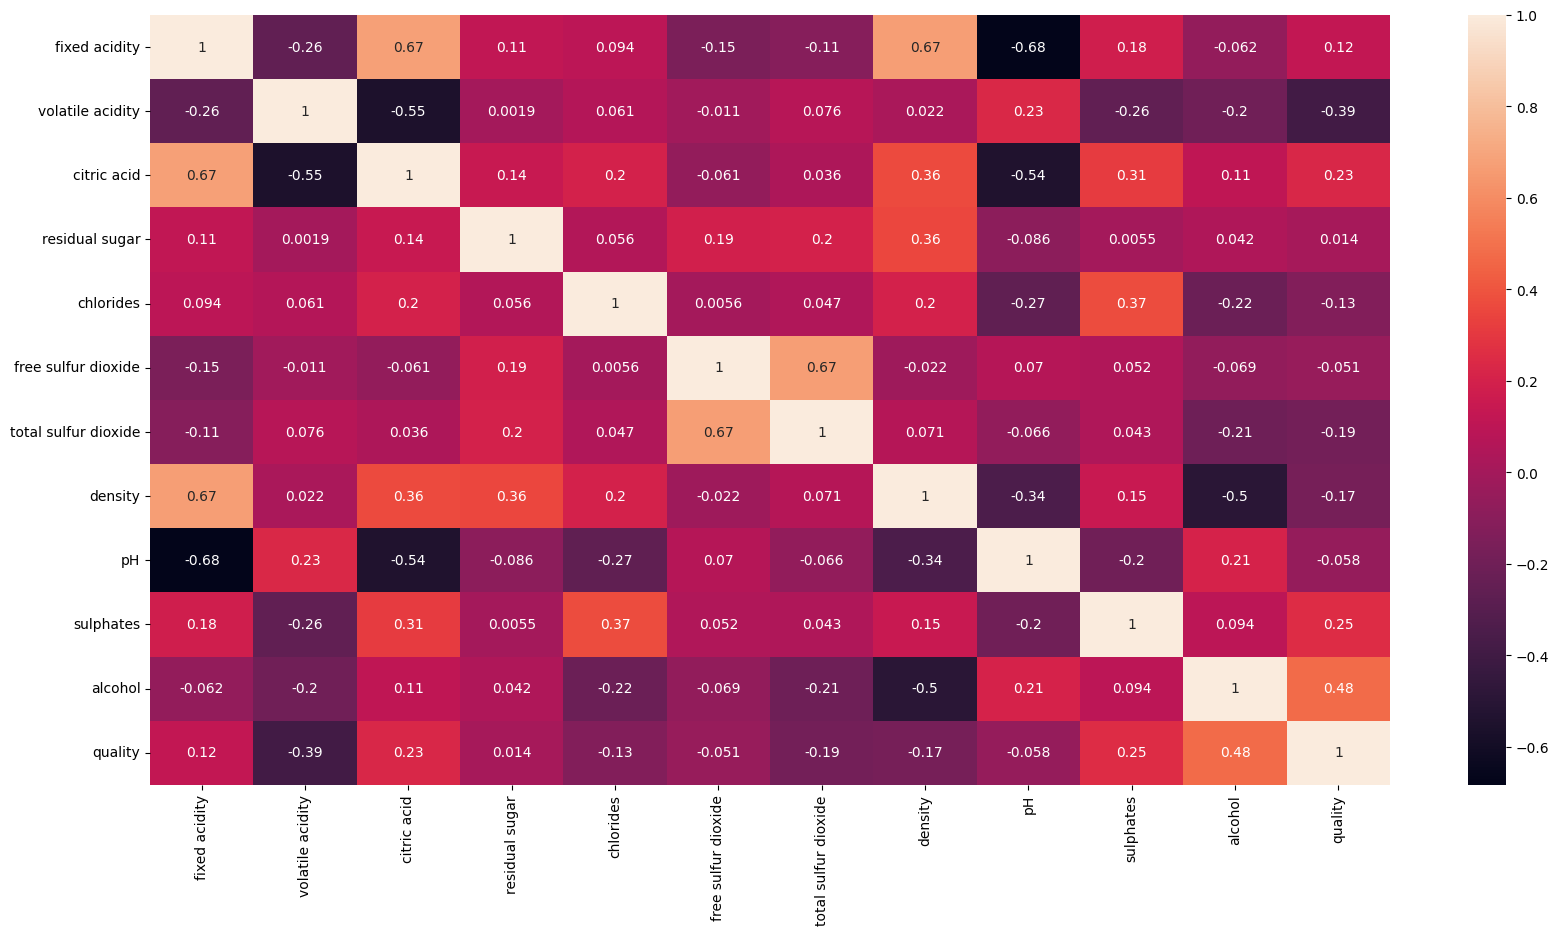

In [6]:
plt.figure(figsize=(20,10))
sab.heatmap(winedf.corr(),annot=True)
plt.show

<Axes: xlabel='quality', ylabel='count'>

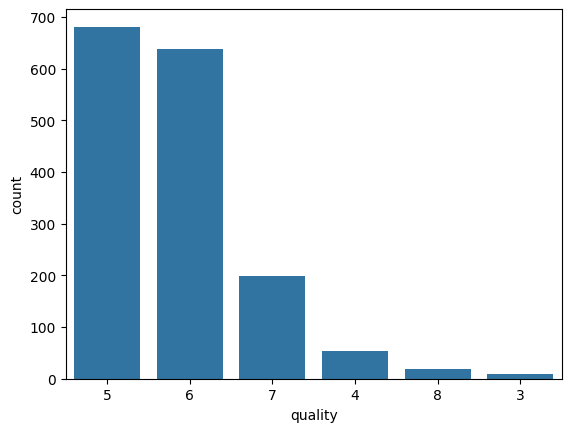

In [7]:



winedfcopy = winedf.copy()



#comparing count of quality categories in data set

winedfcopy.quality = winedfcopy.quality.map({0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'10'})

sab.countplot(x="quality",data=winedfcopy)




<Axes: ylabel='Density'>

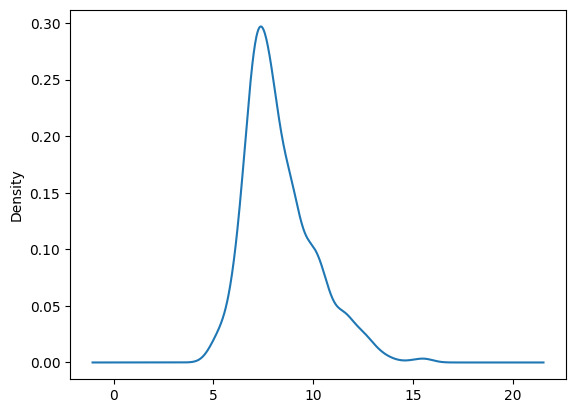

In [8]:
winedfcopy.head()

winedfcopy['fixed acidity'].plot.kde()

#winedfcopy['volatile acidity'].plot.kde()

#winedfcopy['citric acid'].plot.kde()

Text(0.5, 1.0, 'fixed acidity vs quality')

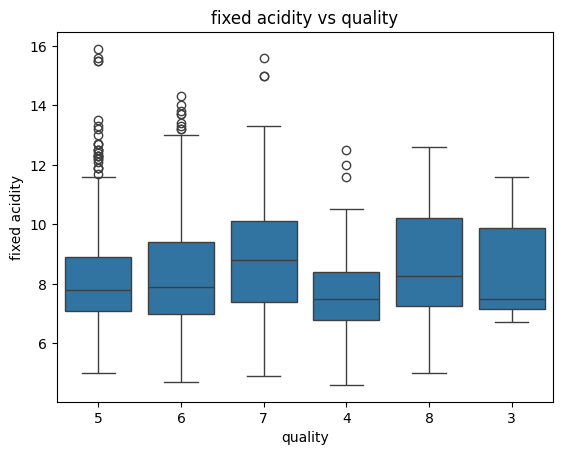

In [9]:
sab.boxplot(x=winedfcopy['quality'],y=winedfcopy['fixed acidity'])

plt.title("fixed acidity vs quality")


Text(0.5, 1.0, 'volatile acidity vs quality')

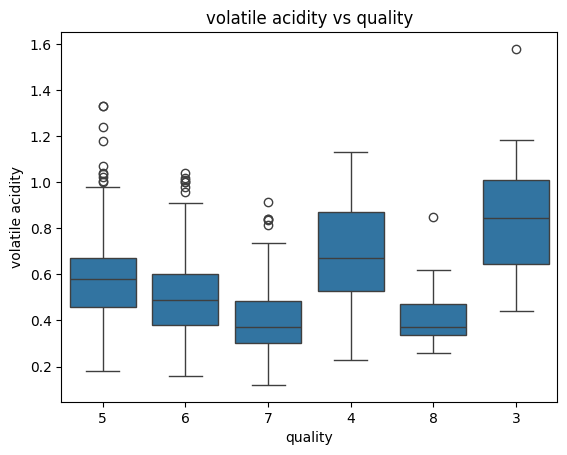

In [10]:
sab.boxplot(x=winedfcopy['quality'],y=winedfcopy['volatile acidity'])

plt.title("volatile acidity vs quality")


In [11]:
x=winedfcopy.drop('quality',axis=1)

y = winedfcopy['quality']

x.head()

y.head()

y=y.astype('int64')
 
y.head()


0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [12]:
model = keras.Sequential()
model.add(layers.Dense(11, activation ='relu',input_dim=11))
model.add(layers.Dropout(0.3))  # Randomly drop 30% of units
model.add(layers.Dense(5, activation ='relu'))
model.add(layers.Dense(10, activation ='softmax'))  #10 layers because quality of wine ranges from 1 to 10



c:\Users\Waqar Musa Loon\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

history = model.fit(x,y,batch_size=100,epochs=50,validation_split=0.33)

model.summary()

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.0868 - loss: 4.2704 - val_accuracy: 0.1818 - val_loss: 2.7908
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1335 - loss: 3.5489 - val_accuracy: 0.2386 - val_loss: 2.4869
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1849 - loss: 3.0935 - val_accuracy: 0.3087 - val_loss: 2.3265
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2409 - loss: 2.7365 - val_accuracy: 0.3428 - val_loss: 2.2500
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2745 - loss: 2.5372 - val_accuracy: 0.3674 - val_loss: 2.2063
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3128 - loss: 2.3752 - val_accuracy: 0.3769 - val_loss: 2.1817
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3277 - loss: 2.3597 - val_accuracy: 0.4773 - val_loss: 2.1527
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3828 - loss: 2.1993 - val_accuracy: 0.4792 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 758 (2.96 KB)

 Trainable params: 252 (1008.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 506 (1.98 KB)

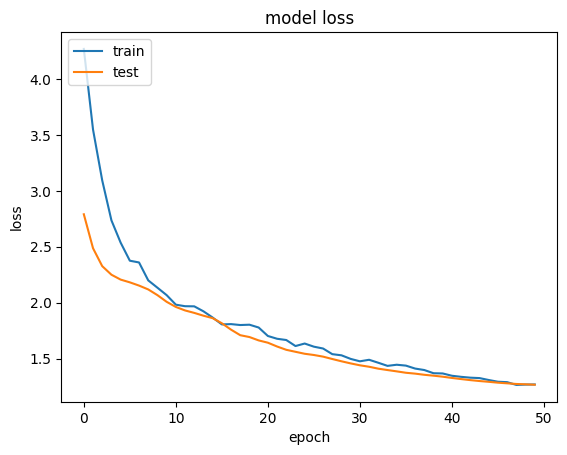

In [14]:
#step7 visalize and prediction 

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train','test'],loc='upper left')

plt.show()


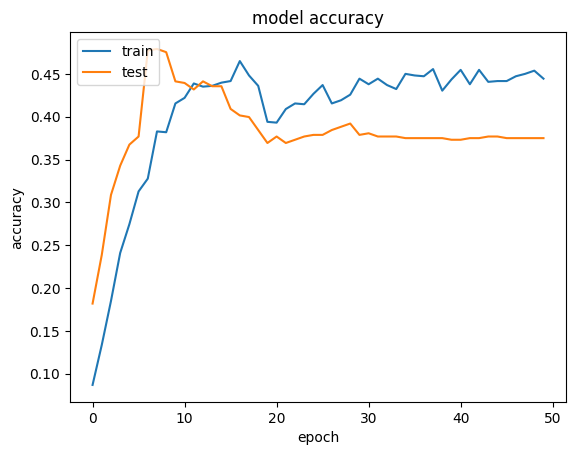

In [15]:
#step7 visalize and prediction 

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train','test'],loc='upper left')

plt.show()


In [16]:

winedfcopy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
import numpy 

from numpy import array



xnew = array([[8.3,      # fixed acidity
               0.655,      # volatile acidity
               0.12,      # citric acid
               2.3,    # residual sugar
               0.083,    # chlorides
               15.0,       # free sulfur dioxide
               113.0,       # total sulfur dioxide	
               0.9966,       # density
               3.17,       # pH
               0.66,       # sulphates
               9.8   # alcohol
               ]])


#converting the data into float data for the system to analyze easily

xnew = numpy.array(xnew,dtype=numpy.float64)

#predication model

ynew = model.predict(xnew)

print(ynew)

maxindexrow = np.argmax(ynew,axis=1)

print(maxindexrow)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
[[2.2196248e-06 1.3798962e-07 1.4337967e-11 2.7560606e-03 2.2237322e-03
  6.9121277e-01 2.9788855e-01 5.3962362e-03 5.2030454e-04 1.1052178e-09]]
[5]


In [18]:
#savemodel

model.save('D:/PYTHON/3.Models/saved models/winemodel.h5')



In [19]:
#load the model 

from tensorflow.keras.models import load_model

loadedwinemodel = load_model('D:/PYTHON/3.Models/saved models/winemodel.h5')

In [22]:
import numpy 

from numpy import array



xnew = array([[8.3,      # fixed acidity
               0.655,      # volatile acidity
               0.12,      # citric acid
               2.3,    # residual sugar
               0.083,    # chlorides
               15.0,       # free sulfur dioxide
               113.0,       # total sulfur dioxide	
               0.9966,       # density
               3.17,       # pH
               0.66,       # sulphates
               9.8   # alcohol
               ]])


#converting the data into float data for the system to analyze easily

xnew = numpy.array(xnew,dtype=numpy.float64)

#predication model

ynew = model.predict(xnew)

print(ynew)

maxindexrow = np.argmax(ynew,axis=1)

print(maxindexrow)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
[[2.2196248e-06 1.3798962e-07 1.4337967e-11 2.7560606e-03 2.2237322e-03
  6.9121277e-01 2.9788855e-01 5.3962362e-03 5.2030454e-04 1.1052178e-09]]
[5]
